In [40]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')

numpy: 2.3.2
pandas: 2.3.1
scipy: 1.16.1
scikit-learn: 1.7.1
seaborn: 0.13.2


In [41]:
os.chdir("../data")
print(os.getcwd())

/workspaces/4Geeks_final_project/data


In [42]:
df = pd.read_csv("clean_superstore_dataset.csv", encoding='latin1')

df.head()

,Row_ID,Order_Date,Sales,Turnaround_Time,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Product_ID_encoded,Ship_Mode_first class,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,15100992000,261.9600,259200.0,166,193,15,215,12,False,...,False,False,False,False,False,False,False,False,False,False
1,2,15100992000,731.9400,259200.0,166,193,15,215,55,False,...,False,False,False,False,False,False,False,False,False,False
2,3,14972256000,14.6200,345600.0,201,264,3,512,943,False,...,False,False,False,True,False,False,False,False,False,False
3,4,14761440000,957.5775,604800.0,687,152,8,168,319,False,...,False,False,False,False,False,False,False,False,False,True
4,5,14761440000,22.3680,604800.0,687,152,8,168,1313,False,...,False,False,False,False,False,False,False,True,False,False


In [43]:
tt = df[["Postal_Code_encoded","State_encoded", "Category_furniture", "Category_office supplies","Category_technology", "Turnaround_Time"]]

In [44]:
tt

,Postal_Code_encoded,State_encoded,Category_furniture,Category_office supplies,Category_technology,Turnaround_Time
0,215,15,True,False,False,259200.0
1,215,15,True,False,False,259200.0
2,512,3,False,True,False,345600.0
3,168,8,True,False,False,604800.0
4,168,8,False,True,False,604800.0
...,...,...,...,...,...,...
9552,343,11,False,True,False,604800.0
9553,223,33,False,True,False,432000.0
9554,223,33,False,False,True,432000.0
9555,223,33,False,False,True,432000.0


In [45]:
from sklearn.model_selection import train_test_split

X = tt.drop("Turnaround_Time", axis = 1)
y = tt["Turnaround_Time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [46]:
X

,Postal_Code_encoded,State_encoded,Category_furniture,Category_office supplies,Category_technology
0,215,15,True,False,False
1,215,15,True,False,False
2,512,3,False,True,False
3,168,8,True,False,False
4,168,8,False,True,False
...,...,...,...,...,...
9552,343,11,False,True,False
9553,223,33,False,True,False
9554,223,33,False,False,True
9555,223,33,False,False,True


In [47]:
y

0       259200.0
1       259200.0
2       345600.0
3       604800.0
4       604800.0
          ...   
9552    604800.0
9553    432000.0
9554    432000.0
9555    432000.0
9556    432000.0
Name: Turnaround_Time, Length: 9557, dtype: float64

In [48]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state = 42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [49]:
y_pred = model.predict(X_test)
y_pred

array([306207.6 , 415485.72, 298632.12, ..., 419615.8 , 382213.62,
       356611.5 ], shape=(1912,), dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error as mse , r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 23624477769.653217
Coefficient of determination: 0.0017050218924354876


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose =1, n_jobs= -1)

In [52]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 10, 'subsample': 1.0}


In [53]:
best_model = XGBRegressor(colsample_bytree = 1.0, learning_rate = 0.1, max_depth = 3 , n_estimators = 200, reg_alpha = 0.1, reg_lambda = 10, subsample = 1.0)

best_model.fit(X_train, y_train)
y_pred2 = best_model.predict(X_test)

print(f"Mean squared error: {mse(y_test, y_pred2)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred2)}")

Mean squared error: 23357067101.964622
Coefficient of determination: 0.013004942646189899


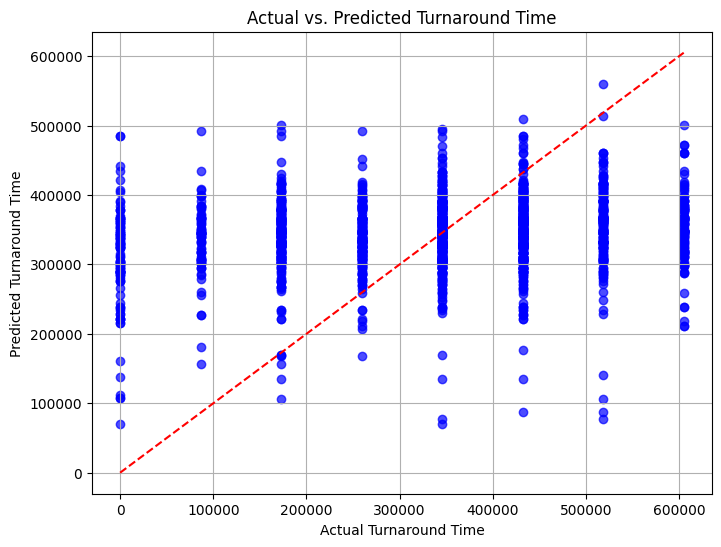

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Turnaround Time")
plt.ylabel("Predicted Turnaround Time")
plt.title("Actual vs. Predicted Turnaround Time")
plt.grid(True)
plt.show()

In [55]:
residuals = y_test - y_pred

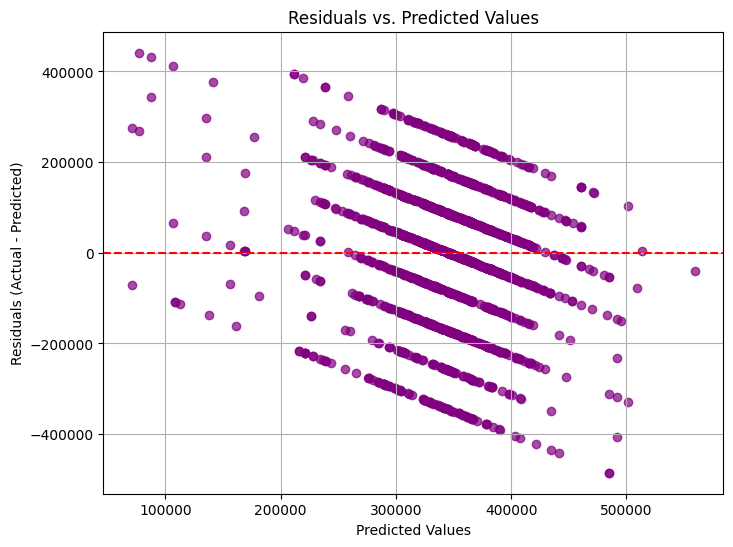

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()

In [57]:
os.chdir("../models")
print(os.getcwd())

/workspaces/4Geeks_final_project/models


In [59]:
import pickle

with open("turnaroundtime_predictor.pkl", "wb") as f:
    pickle.dump(best_model, f)